# Scikit-Learn Unsupervised Learning

Unsupervised transformations:
- create a new representation of the data (easier to interpret)
- dimensionality reduction
- extraction of components, essential characteristics of the data

Challenges:
- wether is has learned something useful, no label info, no idea what is right. 
- often used in an exploratory setting, to understand better than as part of an automatic system.

## Preprocessing

In [2]:
import mglearn as mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_scaling()
plt.show()

<Figure size 1500x800 with 5 Axes>

- `StandardScaler`: ensures that for each feature the mean is zero and the variance/sd equal one, bringing features to the same magnitude.

**This does not ensure any particular minimum or maximum**

- `RobustScaler`: uses median and quartiles instead of mean and variance. Which makes it ignore data points that are very different from the rest (outliers) which can lead to trouble.

- `MinMaxScaler`: makes data between 0 and 1. 

- `Normalizer`: it scales each data point such that the feature vector has an euclidean distance of 1. Projects everything on a 'sphere of high dimensions' of radius 1. **Each data point is scaled by a different number, by the inverse of its length**. This is used when only the direction/angle matters, but not the length.

### Applying Data Transformations

In [3]:
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape) 
print(X_test.shape)

(426, 30)
(143, 30)


In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
  # transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape)) 
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0))) 
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0))) 
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
per-feature maximum before scaling:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+0

- Now apply the same transformation to the test set.

**The minimum and maximum of the test set are not necesarilly between 0 and 1**

In [21]:
X_test_scaled = scaler.transform(X_test)

X_test_scaled.min(axis=0)

array([ 0.0336031 ,  0.0226581 ,  0.03144219,  0.01141039,  0.14128374,
        0.04406704,  0.        ,  0.        ,  0.1540404 , -0.00615249,
       -0.00137796,  0.00594501,  0.00430665,  0.00079567,  0.03919502,
        0.0112206 ,  0.        ,  0.        , -0.03191387,  0.00664013,
        0.02660975,  0.05810235,  0.02031974,  0.00943767,  0.1094235 ,
        0.02637792,  0.        ,  0.        , -0.00023764, -0.00182032])

### `scaler.fit(X)` and `scaler.fit_transform(X)`

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining) 
X_train_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_train_scaled = scaler.fit_transform(X_train)

### Applying to a model

In [77]:
from sklearn.svm import SVC
import numpy as np

svm = SVC(C=100, gamma='auto')


scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format( svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [76]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(svm.score(X_test_scaled, y_test))

0.965034965035


## Dimensionality Reduction and Feature Extraction 

### PCA: Principal Component Analysis

- The algorithm proceeds by finding the direction of maximum variance 'Component 1'. This is the direction or vector in the data that contains most of the information. **The direction among which the features are most correlated with each other**
- Then the algorithm finds the direction that contains most information while being orthogonal to the first direction. In two dimensions, there is only one possible orientation that is at right angle. But in higher dimensional spaces there would be (infinitely) many orthogonal directions.

**The directions found using this process are the main directions of varience in the data** 

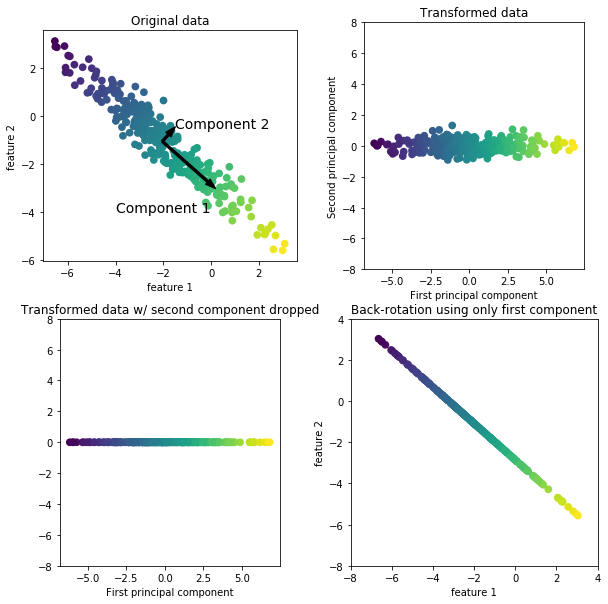

In [102]:
mglearn.plots.plot_pca_illustration()

The top right shows the the same data, but rotated so that the first component aligns with the x-axis and the second principal component alligns with the y-axis. Before the rotation **the mean was substracted from the data, so that the transformed data is centered around 0**

We can use PCA for dimensionality reduction. When we drop the second component (bottom left), keeping only the most interesting direction (the principal component). **Finally we undo the rotation and add back the mean to the data**

- This is sometimes used to remove noise effects from the data.

- One of the most common applications: **to visualize high dimensional data sets**.

### Cancer dataset visualization 30 features

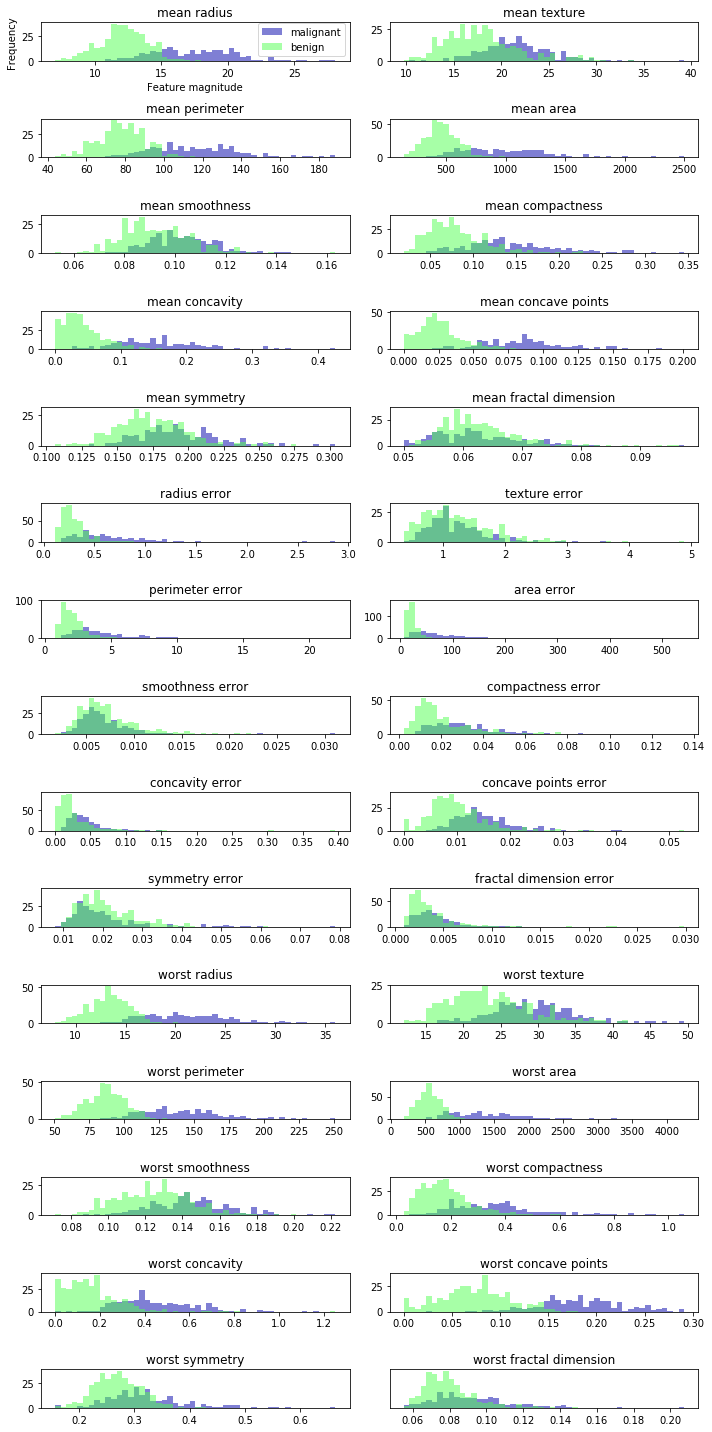

In [107]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5) 
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5) 
    ax[i].set_title(cancer.feature_names[i])
ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Gives us an idea of how each feature is distributed across the two classes, and allows to venture a guess to which features are better at distinguishing malignant and benign.

- **worst concave points seem quite informative because the histograms are quite disjoint.**
- smoothness error is highly uninformative because the histograms mostly overlap

### PCA

To capture the main interactions and capture a more complete pic.

Let's plot the first two principal components.

- Before applying PCA, we scale each feature with `StandardScaler` so that it has variance 1.

In [113]:
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [116]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data 
pca = PCA(n_components=2)
# fit PCA model to breast cancer data 
pca.fit(X_scaled)
    # transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [127]:
# You still have the output column untouched to retrieve
cancer.target.shape

(569,)

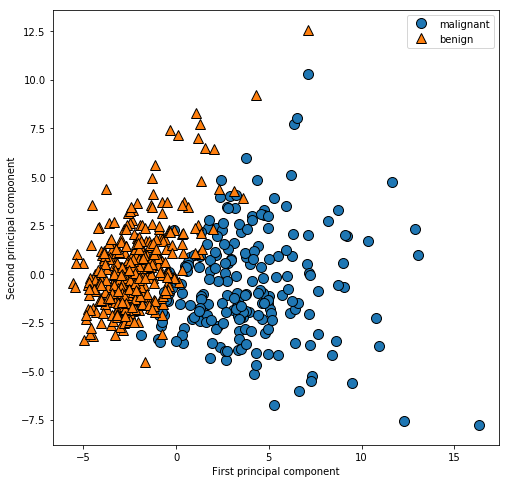

In [123]:
  # plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
#plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

**NOTE**: PCA does not use any class information whatsoever 

- You can see that the classes separate quite well in this 2-dimensional data space. This leads to believe that even a line would do a good job.

- We can also see that **malignant points are more spread out than the beningn (blue) points**

In [128]:
pca.components_.shape

(2, 30)

Two columns for the principal components. And 30 rows for the features.

- **The principal components correspond to directions in the original data, so they are combinations of the original features**

In [138]:
print('PCA components:\ {}'.format(pca.components_))

PCA components:\ [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


- Visualize the coefficients to interpret better

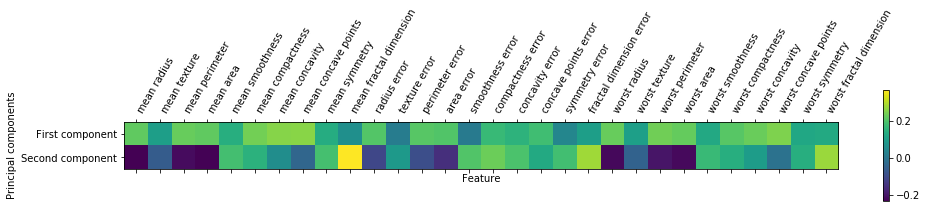

In [141]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

## Eigenfaces for feature extraction

Another application of PCA is feature extraction.

- The idea behind feature extraction is that it is possible to find a representaton of your data that is better suited to analysis than the raw representation you were given

#### People Bunch

- There are 3023 images, each 87x65 pixels large, belonging to 62 different people

In [4]:
people.keys()

NameError: name 'people' is not defined

In [167]:
print(people.images.shape)
print(len(people.target_names))

(3023, 87, 65)
62


`people.data` contains the 3023 images. For each image an array of (87x 65) = 5655 values

This is our `X` , the `y` is our `people.target`

In [228]:
print(people.target.shape)
print(len(set(people.target)))

(3023,)
62


Which our accesed with the help of `people.target_names`

In [223]:
people.data.shape

(3023, 5655)

In [214]:
people.data[0].shape

(5655,)

## Printing a single image

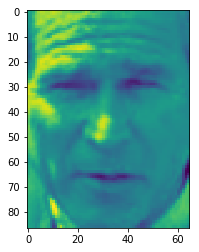

In [1020]:
plt.imshow(people.images[10])
plt.show()

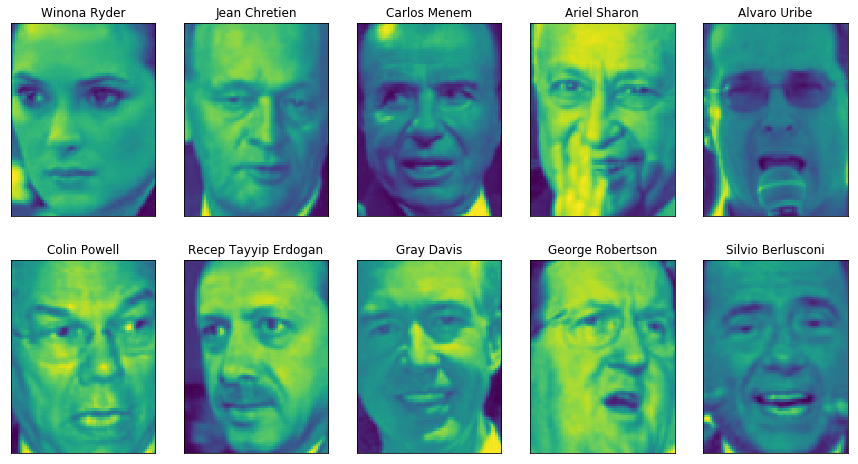

In [5]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)


fig, axes = plt.subplots(2,5, figsize=(15,8),
                        subplot_kw={'xticks':(),
                                    'yticks':()})
for target, image, ax in zip(people.target, 
                            people.images,
                            axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

- The data is a bit skewed, containing a lot of images of George Bush:

In [203]:
# number of targets with number 1 as first, then sec..
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ') 
    if(i+1)%3==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [209]:
people.data[0].shape

(5655,)

In [212]:
people.data.shape

(3023, 5655)

In [211]:
87*65

5655

In [7]:
import numpy as np
mask = np.zeros(people.target.shape, dtype=np.bool) 
for target in np.unique(people.target):
        mask[np.where(people.target == target)[0][:50]] = 1
        
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 
# instead of 0 and 255 for better numeric stability 
X_people = X_people / 255.

### Training some models


In [8]:
print(X_people.shape)
print(y_people.shape)

(2063, 5655)
(2063,)


In [19]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

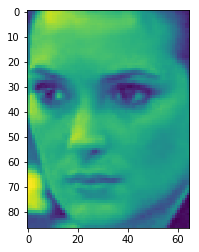

In [20]:
plt.imshow(people.images[0])

In [23]:
people.images[0].flatten()

array([ 57.        ,  60.33333206,  78.        , ...,  17.33333397,
        16.66666603,  22.66666603], dtype=float32)

In [27]:
people.data[0].shape

(5655,)

In [10]:
X_people.shape

(2063, 5655)

In [14]:
87*65

5655

In [12]:
X_people[0].shape

(5655,)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('test score: {:.2f}'.format(knn.score(X_test, y_test)))

test score: 0.23


In [240]:
from sklearn.neural_network import MLPClassifier
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

neural = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(100,100))
neural.fit(X_train, y_train)
print('test score: {:.2f}'.format(neural.score(X_test, y_test)))

test score: 0.45


Now let's try the same using some PCA components:

- The kNN model got better
- The neural network got slightly worse

### Applying PCA

In [349]:
pca = PCA(n_components=100, whiten=True,
          random_state=0).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape: {}'.format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


### Training

In [254]:
from sklearn.neighbors import KNeighborsClassifier
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('test score: {:.2f}'.format(knn.score(X_test_pca, y_test)))

test score: 0.31


In [259]:
from sklearn.neural_network import MLPClassifier
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

neural = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(100,100))
neural.fit(X_train_pca, y_train)
print('test score: {:.2f}'.format(neural.score(X_test_pca, y_test)))

test score: 0.41


## Here upload a photo of alvaro uribe from the internet 

- convert to the right shape 85x65
- jpg to matrix?

Check if it predicts it correctly.. :D

### Visualizing PCA components

Components correspond to directions in the input space here the space is 87x65 pixel images, so the directions within space are also 87x65 pixel images..

In [267]:
87*65

5655

In [260]:
# 100 components 
pca.components_.shape

(100, 5655)

In [268]:
# first component
pca.components_[0].shape

(5655,)

- Printing the first component

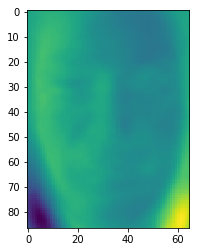

In [1023]:
plt.imshow(pca.components_[4].reshape(87, 65))
plt.show()

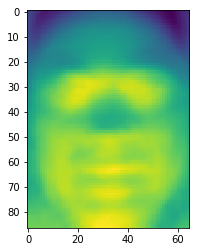

In [273]:
plt.imshow(pca.components_[2].reshape(87, 65))
plt.show()

In [315]:
pca.components_.shape

(100, 5655)

#### Summing Individual Components

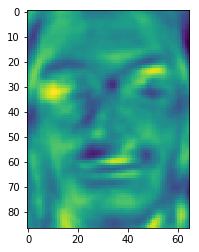

In [1026]:
summed_components = np.array([pca.components_[0]])
for i in range(99
            ):
    summed_components += pca.components_[i+1]

plt.imshow(summed_components.reshape(87,65))
plt.show()

### Expressing the test points as a weighted sum of the principal components

In [274]:
pca.components_.shape

(100, 5655)

In [380]:
pca.n_samples_

1547

In [298]:
image_shape = people.images[0].shape

In [389]:
import numpy as np

# Solving following system of linear equation
# 3x + 2y + z = 2
# 2x + 2y + 4z = 4
# -x + 0.5y + z = 2
a = np.array([[3,2,1],
              [2,2,4],
              [-1, 0.5, 1]])
b = np.array([2,4,2])
print(np.linalg.solve(a,b))

[-0.66666667  1.77777778  0.44444444]


## Let's find the matrix for which I need to multiply the first component to find this face:

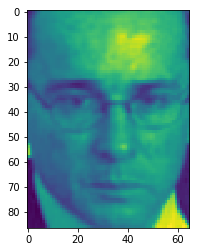

In [420]:
plt.imshow(people.images[people.target == 1][10])
plt.show()

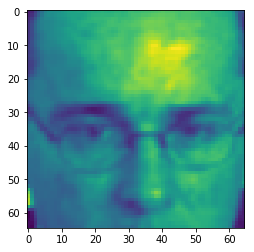

In [486]:
# we can find a solution for a 65 by 65 matrix
plt.imshow(parac_face[:65])
plt.show()

In [424]:
people.images[people.target==1][10].shape

(87, 65)

In [488]:
# This is our data: 87 rows and 65 columns
parac_face = people.images[people.target==1][10]
# Making it square 65 by 65
parac_face = parac_face[:65]

[my_matrix][some_matrix] = [parac_face]

- As I still don't know how to find a possible matrix. 
- We will solve 65 systems of equations. Each one determining the column of some_matrix

Let's find this out!

In [590]:
# we will find the matrix for which we need to multiply this component to retrieve the face of uribe
# Solving the linear equation

# this is the matrix. 
#Change the component and it will still work
my_matrix = pca.components_[10].reshape(87, 65)
my_matrix = my_matrix[:65]

# we create a row with 65 zeros, and we will add rows vertically.
some_matrix = np.array([0 for i in range(65)])
for i in range(65):
    solution = parac_face[:, [i]].reshape(-1)
    variables = np.linalg.solve(my_matrix, solution)
    some_matrix = np.vstack([some_matrix, variables])

# our solutions are returned as rows, we transform rows into columns.  
some_matrix = some_matrix.T

### RECONSTRUCTED ALVARO
HOLY SHIT!!

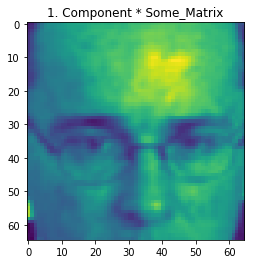

In [591]:
reconstructed_alvaro = np.matmul(my_matrix, some_matrix)
# I plot after the first column, that one is full of zeros. The one I used to initially vstack.
plt.imshow(reconstructed_alvaro[:,1:])
plt.title('1. Component * Some_Matrix')
plt.show()

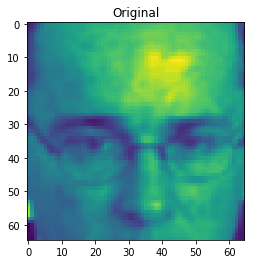

In [600]:
plt.imshow(parac_face)
plt.title('Original')
plt.show()

## NICE

So imshow() doesn't care about the pixels being between 0 and 255 as normally. But rather about the minimum and maximum value. Scaling the whole matrix by any number does not change how the image looks.

So even changing only one side would affect the other one too.

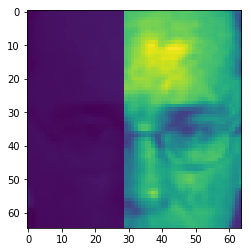

In [671]:
half_face = np.hstack([parac_face[:, :29],  
                       parac_face[:,30:]*10])
plt.imshow(half_face)
plt.show()

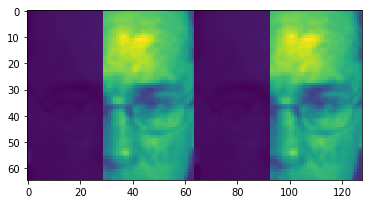

In [657]:
half_face = np.hstack([parac_face[:, :29],  parac_face[:,30:]*10])
plt.imshow(np.hstack([half_face, half_face]))
plt.show()

But still, how to find numbers so that the multiplication of all components is equal to the face of alvaro, with transposed matrix.


- Another way we can try to understand what a PCA model is doing, is by looking at the reconstruction of the original data using only some components.

### Getting rid of noise
- z.B (before) after dropping a component, we undid the rotation and added the mean back to **obtain new points in the original space with the second component removed**.



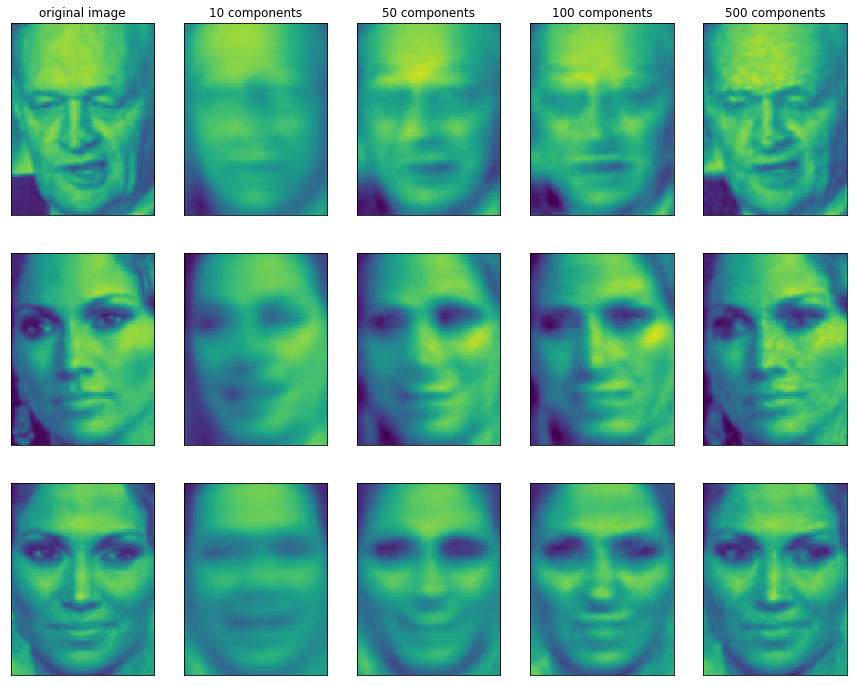

In [672]:
mglearn.plots.plot_pca_faces(X_train, X_test,
                            image_shape)

In [1033]:
y = [i**3 for i in range(10)]

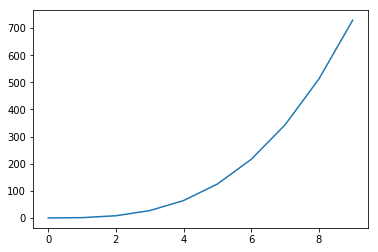

In [1032]:
plt.plot(y)
plt.show()

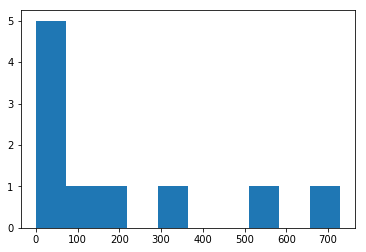

In [1035]:
plt.hist(y)
plt.show()

In [1038]:
buttontable = widgets.Button(description='Display Table')
outtable = widgets.Output()
def on_buttontable_clicked(b):
    with outtable:
        plt.plot(y)
        plt.show()
buttontable.on_click(on_buttontable_clicked)
widgets.VBox([buttontable,outtable])

In [1039]:

widgets.VBox([buttontable, buttontable, buttontable,outtable])

In [726]:
np.argsort(X_train_pca[:, 1])[::-1]

array([ 838,  315, 1470, ..., 1407, 1533, 1283])

- By using more adn more components, more details in the image are preserved.

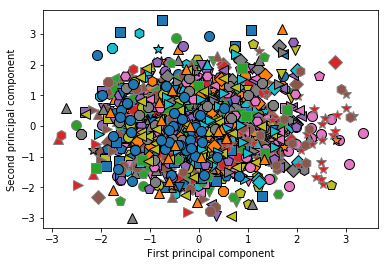

In [675]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

- Trying to visualize all the faces using only the first two principal components => A big blob.  As seen above, even with 10 components PCA captures very rough characteristics of the faces.

# Non-Negative Matrix Factorization (NMF)


- Aims to extract features. As in PCA we try to write each data point as a weighted sum of some components.
- Whereas in PCA we wanted components that were orthogonal and that explained as much variance as possible, here we want **the components and coefficients to be greater than or equal to zero** 

- Can only be applied to **data where each feature is non-negative**. Where the data lies relative to the origin (0,0) actualyl matters for NMF.
    - You can think of **non-negative components that are extracted as directions from (0,0) toward the data**.


- Useful for decomposing data created by the addition (overlay) of several independent sources such as an audio track of multiple people speaking, instruments. 


- NMF leads to more interpretable components overall, as **negative components and coefficients can lead to hard to interpret cancellation effects**

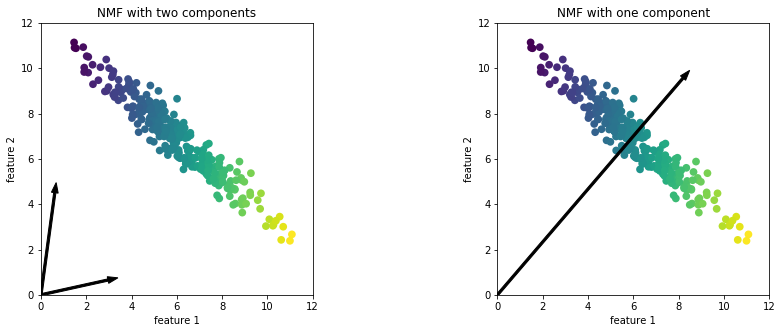

In [677]:
mglearn.plots.plot_nmf_illustration()

- If there are as many components as features, the algorithm will choose directions that point toward the extremes of the data.
- If we use a single component, NMF creates a component that points towards the **mean, as pointing there best explains the data**.

- In contrast with PCA reducing components, **not only removes directions but creates an entirely different set of components**.

- **In NMF components are not ordered in any way, all components play an equal part** 

- It also uses random initialization, which might lead to different results depending on the seed. 

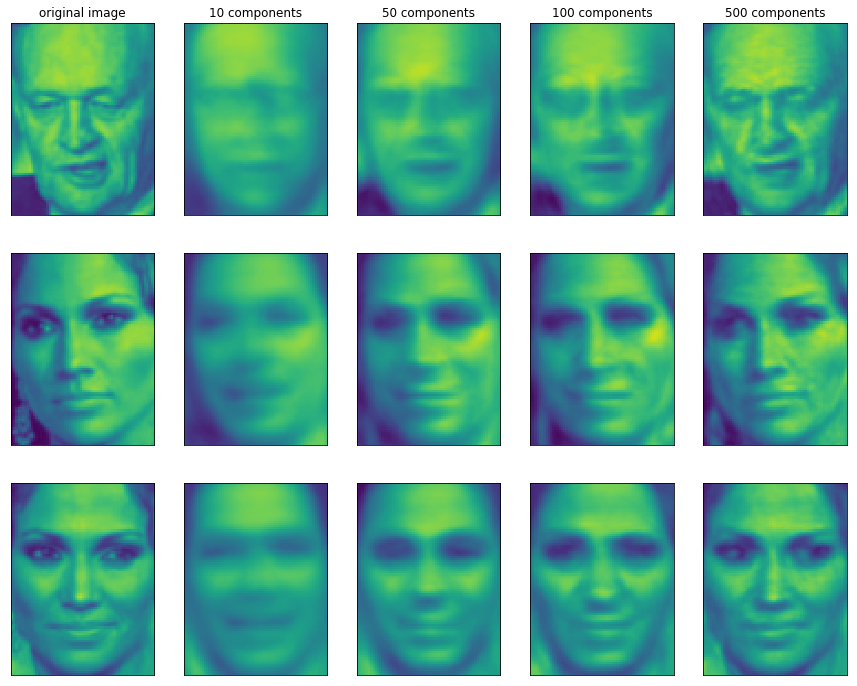

In [679]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)
plt.show()

- The quality of the back-transformed data is similar as in PCA but **slightly worse**.
- NMF is rather used not for its ability to reconstruct data, **but for finding interesting patterns within the data**

In [709]:
# remember that here are 1547 images
X_train.shape

(1547, 5655)

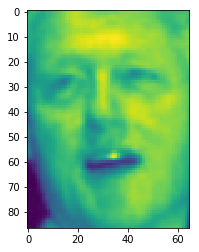

In [714]:
# plotting first image
plt.imshow(X_train[0].reshape(87,65))
plt.show()

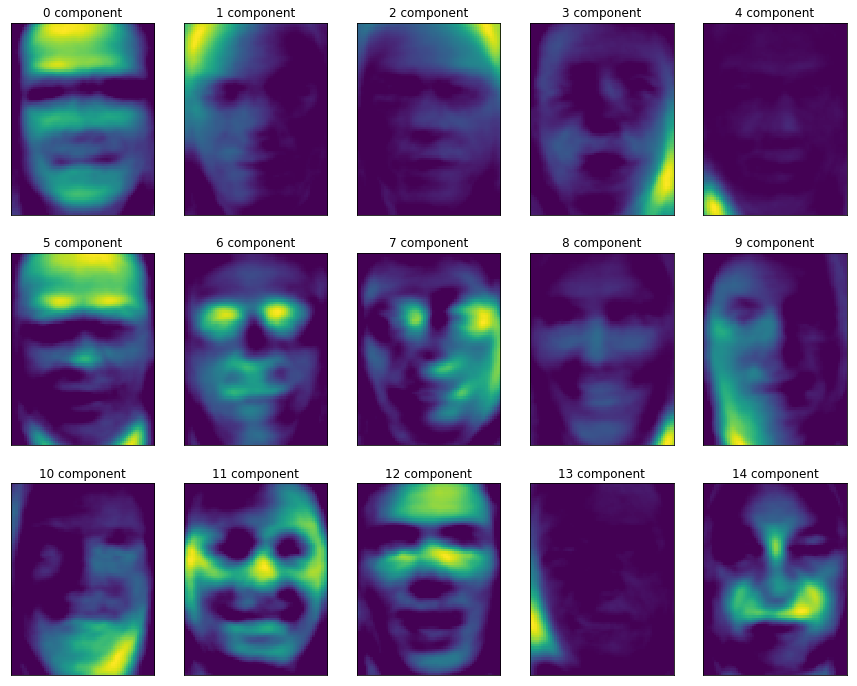

In [744]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3,5, figsize=(15,12),
                        subplot_kw={'xticks':(),
                                    'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_,
                                        axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{} component'.format(i))
plt.show()

These components are all positive, and so resemble prototypes of faces much more than the components shown for PCA.

- We can see that component 3 shows a face rotated to the right and component 7 a face rotated to the left.

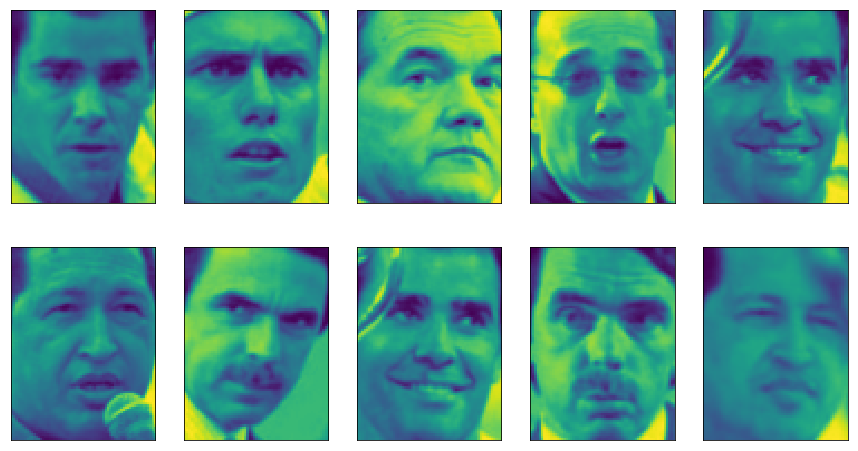

In [745]:
compn = 3
# sort by 3rd component, plot first 10 images 
inds = np.argsort(X_train_nmf[:, compn])[::-1] 

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()}) 

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
        ax.imshow(X_train[ind].reshape(image_shape))

In [723]:
np.argsort(X_train_nmf[:, 1])[::-1]

array([ 828, 1154,  966, ...,  729, 1135,  246])

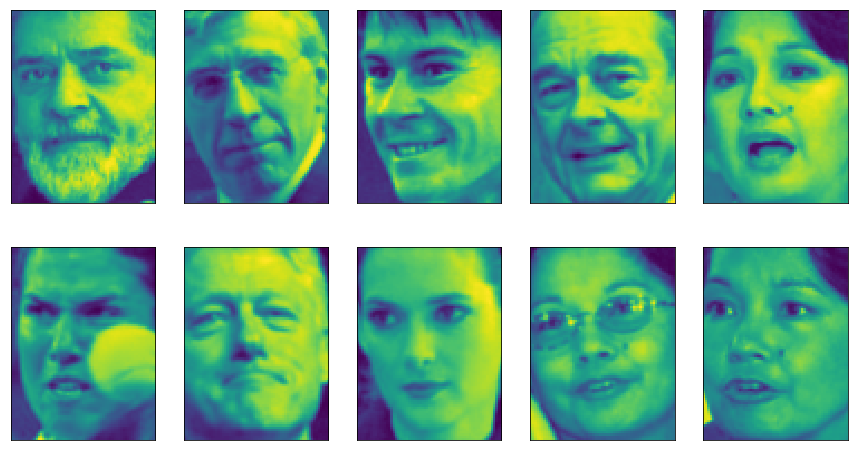

In [692]:
compn = 7
# sort by 3rd component, plot first 10 images 
inds = np.argsort(X_train_nmf[:, compn])[::-1] 

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()}) 

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
        ax.imshow(X_train[ind].reshape(image_shape))

- Component 5 gets us the bold people xD

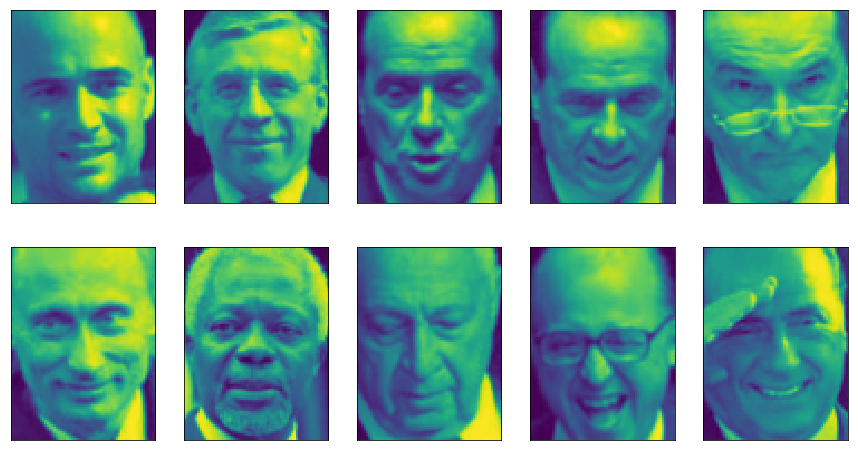

In [694]:
compn = 5
# sort by 3rd component, plot first 10 images 
inds = np.argsort(X_train_nmf[:, compn])[::-1] 

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()}) 

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
        ax.imshow(X_train[ind].reshape(image_shape))

In [698]:
np.argsort([1,2,3,5,1,])[::-1]

array([3, 2, 1, 4, 0])

In [703]:
image_shape

(87, 65)

**As expected: faces that have a high coefficient for component 3 are faces looking to the right**

### Same synthax as above for pca

- Way harder to interpret.
- First component is predominantly dark images

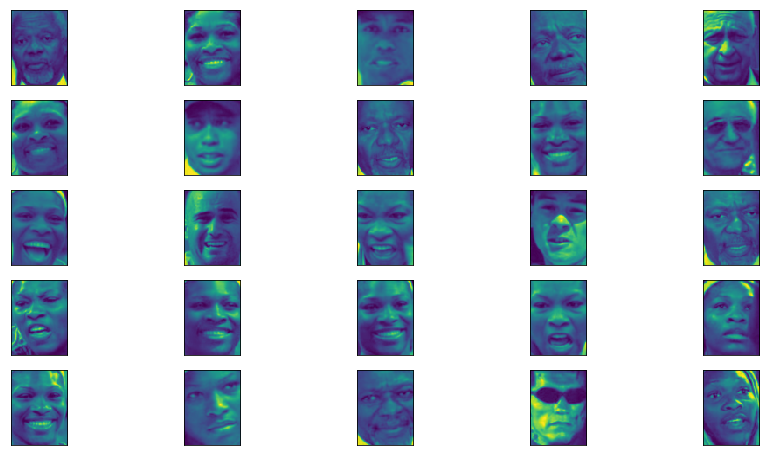

In [743]:
compn = 0
# sort by 3rd component, plot first 10 images 
inds = np.argsort(X_train_pca[:, compn])[::-1] 

fig, axes = plt.subplots(5, 5, figsize=(15, 8),
                        subplot_kw={'xticks': (), 'yticks': ()}) 

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
        ax.imshow(X_train[ind].reshape(image_shape))

### NMF works best for additive data

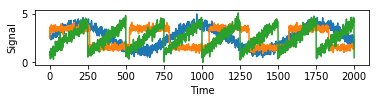

In [13]:
from sklearn.decomposition import NMF
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, "-")
plt.xlabel('Time')
plt.ylabel('Signal')
plt.show()

In [4]:
S.shape

(2000, 3)

- Recover the decomposition of the mixed signal into the original components?

- We assume we have many different ways to observe the mixture ( 100 measurement devices), each provides a series of measurements.



- `np.random.RandomState` exposes a number method for generating random numbers drawn from a variety of probability distributions

- `np.dot` dot product of two arrays

In [20]:
import numpy as np
# Mix data into 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100,3))

In [21]:
A.shape

(100, 3)

In [22]:
A.T.shape

(3, 100)

In [23]:
X = np.dot(S, A.T)

In [24]:
S.shape

(2000, 3)

In [25]:
# 100 measurement devices 
X.shape

(2000, 100)

- Notice how the number of columns of $S$ equals the number of rows of $A.T$

**Recover signal shape** 

In [26]:
nmf = NMF(n_components = 3, 
          random_state=42)

S_ = nmf.fit_transform(X)
print(S_.shape)

(2000, 3)


- The extracted signals have no specific order

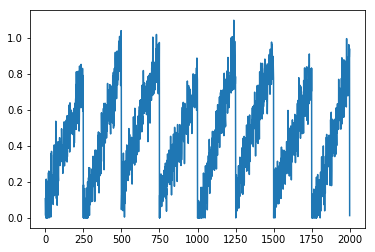

In [29]:
# Plotting one instrument
plt.plot(S_[:,2])
plt.show()

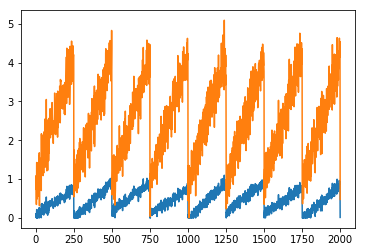

In [30]:
# Plotting second instrument
plt.plot(S_[:, 2])
plt.plot(S[:, 2])
plt.show()

**PCA does not work as well, it has mixing of the signals**

In [782]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)
H.shape

(2000, 3)

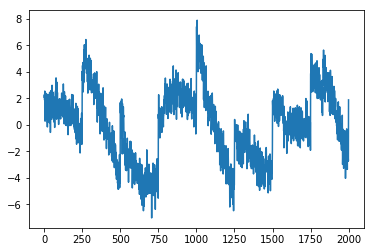

In [785]:
plt.plot(H[:,2])
plt.show()

Many ways to extract the individual signals:
- Indepenent component analysis **ICA**
- Factor Analysis **FA**
- Sparse coding **dictionary learning**

### Manifold Learning with t-SNE

While PCA is good, rotating and then droppign directions limits its usefulness. t-SNE allows for way more complex mappings

- Usually aimed to visualization.
- Can only be applied to the data they were trained for. **Only for the train set**
- Useful for exploratory data analysis
- The idea is to find a representation of the data that **preserves the distances between points as best as possible**
- It tries to preserve information indicating which points are neighbors to each other.

Appliying t-SNE to the digits dataset. Each data point in this dataset is in a 8x8 gray-scale image of handwritten digits between 0 and 1.

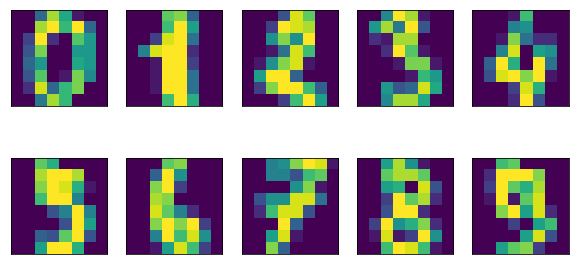

In [794]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5),
                        subplot_kw={'xticks':(),
                                    'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [797]:
type(digits)

sklearn.utils.Bunch

In [798]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [799]:
digits.data.shape

(1797, 64)

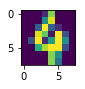

In [809]:
plt.figure(figsize=(1,1))
plt.imshow(digits.data[100].reshape(8,8))
plt.show()

Let's apply PCA, and plot the first two principal components

In [818]:
pca = PCA(n_components=2)
pca.fit(digits.data)

# transform digits onto the first two principal components
digits_pca = pca.transform(digits.data)

In [819]:
digits_pca.shape

(1797, 2)

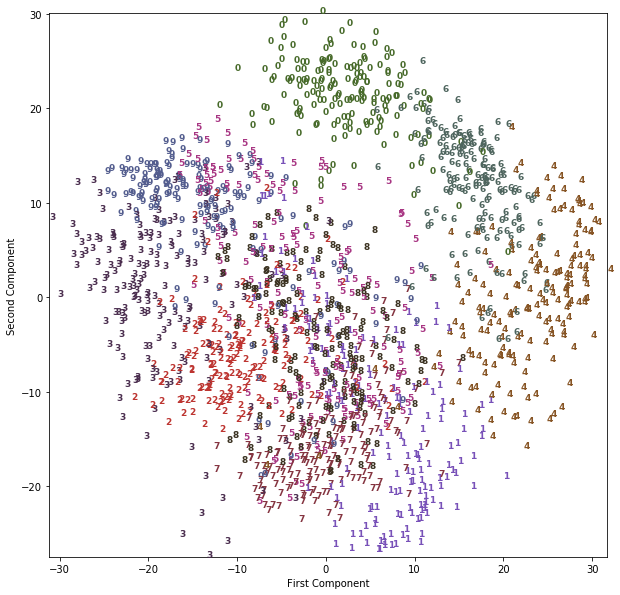

In [817]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
# setting up plot
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # Actually plots the digits as text instead of using a scater
    plt.text(digits_pca[i, 0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]], 
            fontdict={'weight':'bold', 'size':9})
    
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

Digits zero, six and four are relatively well separated, the others overlap significantly.

**Now let's try t-SNE**
- A tool to visualize high dimensional data
- It returns two dimensions

In [836]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform, tSNE has NO transform method
digits_tsne = tsne.fit_transform(digits.data)

In [837]:
digits_tsne.shape

(1797, 2)

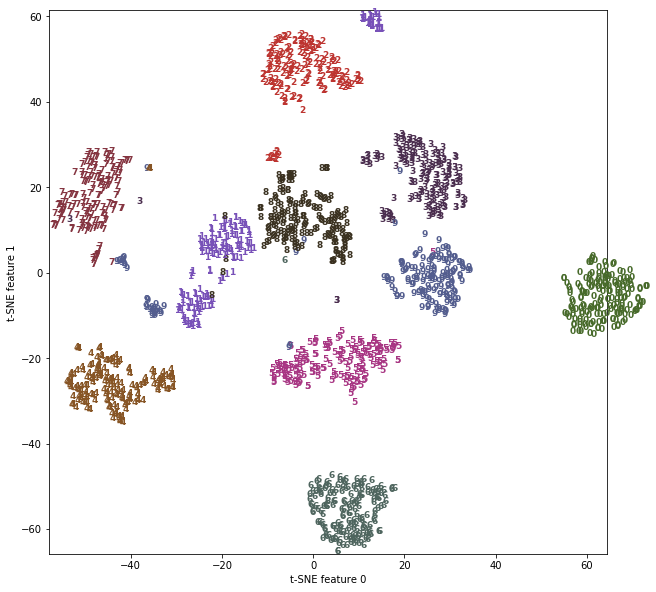

In [838]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,1].max()+4)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    # same
    plt.text(digits_tsne[i, 0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold', 'size':9})
plt.xlabel('t-SNE feature 0')#mistake in the book
plt.ylabel('t-SNE feature 1')
plt.show()

The results is quite remarkable, all the classes are quite clearly separated.

The ones and nines are somewhat slit up, but most of the classes from a single dense group. **It has no labels, but is still able to separate classes based solely on how close are in the original space**

- tSNE has some parameters but works well by default.

In [832]:
?TSNE()

Init signature: TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)
Docstring:     
t-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts
similarities between data points to joint probabilities and tries
to minimize the Kullback-Leibler divergence between the joint
probabilities of the low-dimensional embedding and the
high-dimensional data. t-SNE has a cost function that is not convex,
i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of dimensions to a reasonable amount (e.g. 50)
if the number of features is very high. This will suppress some
noise and speed up the comput

### Clustering

- To split data in such a way that points within a **single cluster are very similar**.
- Similar to classification algorithms, **clustering predict a number to each data point, indicating which cluster** a particular point belongs to

#### k-Means Clustering

Simplest, most commonly used. Tries to find cluster centers that are representative of certain regions in the data.

Alternates between two steps:
- assigning each data point to closest cluster center
- then setting each cluster center as the **mean of the data points assigned to it**.

Finishes when the assignment of instances to clusters no longer changes.

By default, the algorithm runs 10 times with 10 different random initializations and returns the best result: 'best' means that the sum of the variances of the clusters is small

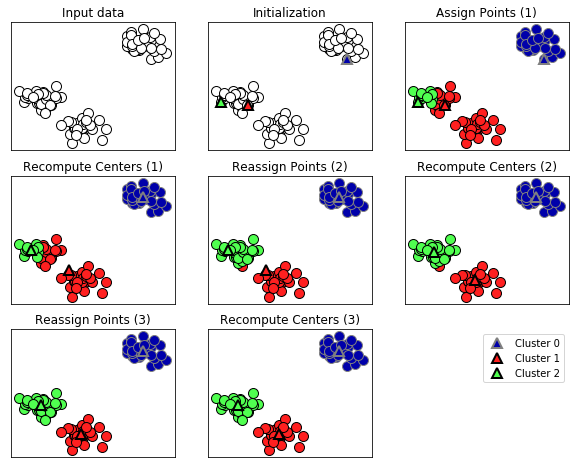

In [839]:
mglearn.plots.plot_kmeans_algorithm()

- We specified that we are looking for 3 clusters, it puts 3 data points randomly as cluster centers.
- Iteration starts: each data point is assigned to the cluster center it is closest to. 
- Next, the cluster centers are updated to be the mean of the assigned points. 
- Process is preated two more times, after the third, the assignment of points to cluster centers remained unchanged, the algorithm stops.

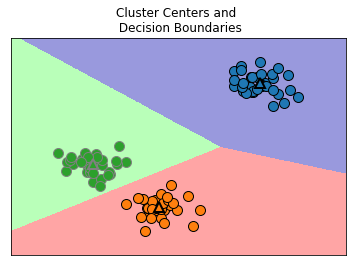

In [842]:
mglearn.plots.plot_kmeans_boundaries()
plt.title('Cluster Centers and \n Decision Boundaries')
plt.show()

Let's apply KMeans

In [845]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

type(kmeans)

sklearn.cluster.k_means_.KMeans

In [886]:
X.shape

(100, 2)

In [848]:
# we asked for three clusters
print('Cluster Memberships:\n ', kmeans.labels_)

Cluster Memberships:
  [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


You can also assign cluster labels to new points, using the predict method. **Each new point is assigned to the closest center**.

Running the training set on predict, would return the same

In [872]:
kmeans.predict(X)

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2,
       1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1,
       0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

In [873]:
X.shape

(100, 2)

In [884]:
points = np.vstack((np.array([1,2]),
                   np.array([5,-40])))
points.shape

(2, 2)

In [885]:
kmeans.predict(points)

array([1, 2], dtype=int32)

The algorithm is similar to classification but there is no ground truth, the labels themselves have **no apriori meaning**

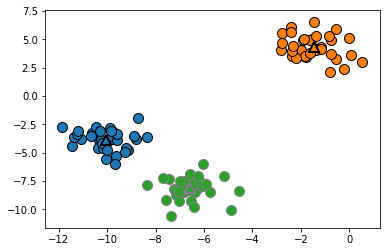

In [893]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], [0, 1, 2],
                        markers='^', markeredgewidth=2)
plt.show()

But we could have also used more clusters:

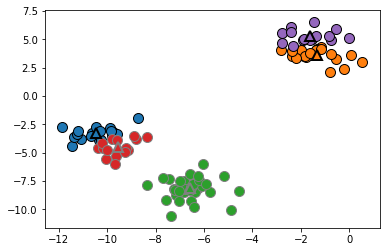

In [896]:
# build the clustering model
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], [0, 1, 2, 3, 4],
                        markers='^', markeredgewidth=2)
plt.show()


### Failure of KMeans
- Even if you know the right number of clusters of a given dataset, *k*-means might not always be able to recover them.

- KMeans only capture a simple shape
- **Assumes that clusters have the same 'diameter' in some way** 

[]

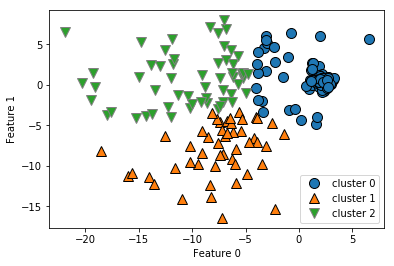

In [902]:
X_varied, y_varied = make_blobs(n_samples=200,
                                    cluster_std=[5, 4, 0.5],
                                    random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.plot()

k-means assumes that all directions are equally important for each cluster.

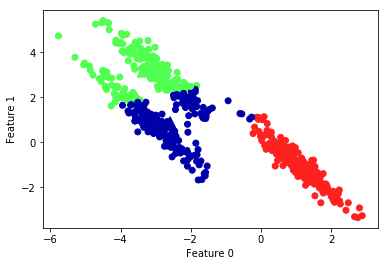

In [903]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Also performs poorly on datasets with complex shapes

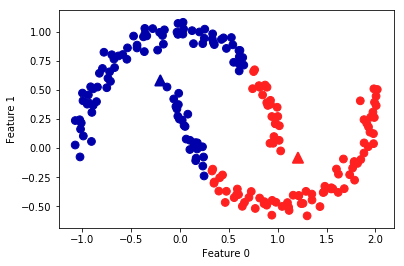

In [904]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

  # plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## Vector quantization and k-means decomposition

PCA tries to find the directions of maximum variance in the data, while NMF tries to find additive components, which often correspond to 'extremes' or 'parts' of the data.

- *k-means* tries to represent each data point using a cluster center. You can think of each point as being represented by a single component (the cluster center). This view of k-means using a single component is called **vector quantization**.

### Comparing PCA, NMF (using 100 components) and kMeans (closest cluster center)

In [907]:
X_train, X_test, y_train, y_test = train_test_split(
        X_people, y_people, stratify=y_people, random_state=0)

In [918]:
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test),
                             nmf.components_)


In [912]:
X_reconstructed_pca.shape

(516, 5655)

In [913]:
X_reconstructed_kmeans.shape

(516, 5655)

In [914]:
X_reconstructed_nmf.shape

(516, 5655)

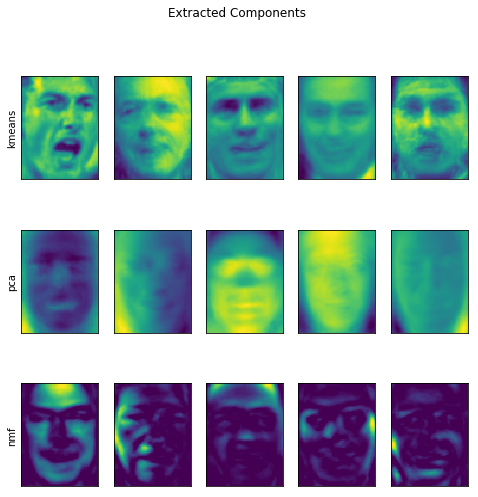

In [919]:
fig, axes = plt.subplots(3,5, figsize =(8,8),
                        subplot_kw={'xticks':(),
                                   'yticks':()})
fig.suptitle('Extracted Components')
for ax, component_kmeans, component_pca, component_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    
    ax[0].imshow(component_kmeans.reshape(image_shape))
    ax[1].imshow(component_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(component_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel('kmeans')
axes[1, 0].set_ylabel('pca')
axes[2, 0].set_ylabel('nmf')
plt.show()

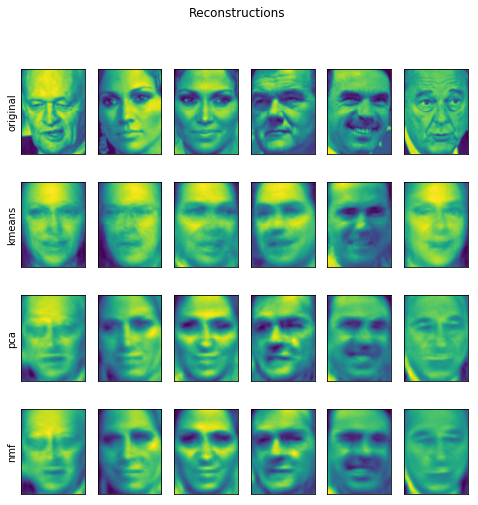

In [920]:
fig, axes = plt.subplots(4,6, figsize=(8,8),
                        subplot_kw={'xticks':(),
                                    'yticks':()})
fig.suptitle('Reconstructions')

for ax, original, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    
    ax[0].imshow(original.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0,0].set_ylabel('original')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')
plt.show()

An interesting aspect of vector quantization is taht we can use many more clusters than input dimensions to encode our data.

Going to the moons-dataset, not much one can do: it has only 2 dimensions.
- Using PCA or NMF would completely destroy the data.
- We can find a more expressive representation with kMeans.

In [951]:
X.shape

(200, 2)

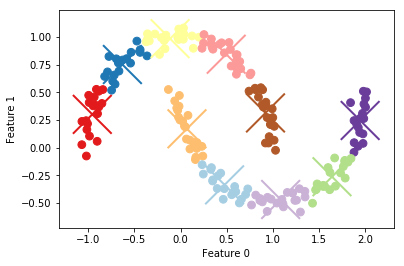

In [933]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            marker='x', s=1500, c=range(kmeans.n_clusters), linewidth=2, 
cmap='Paired')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

- We can now see this data as being represented using 10 components, **we have 10 new features**. 

- **Assuming dummy variables** for the clusters. With all features being 0, except for the one feature for which the class is positive.
___

Using this 10 dimensional dataset now we can actually separate the half-moon using a linear model. Would have not been possible using original 2 features.

**It is also possible to find an even more expressive representation of the data by using the !distances to each of the cluster centers as features!**


In [934]:
distance_features = kmeans.transform(X)
print('Distance features shape {}'.format(distance_features.shape))

Distance features shape (200, 10)


In [935]:
print('Distance features: \n {}'.format(distance_features))

Distance features: 
 [[ 0.9220768   1.46553151  1.13956805 ...,  1.16559918  1.03852189
   0.23340263]
 [ 1.14159679  2.51721597  0.1199124  ...,  0.70700803  2.20414144
   0.98271691]
 [ 0.78786246  0.77354687  1.74914157 ...,  1.97061341  0.71561277
   0.94399739]
 ..., 
 [ 0.44639122  1.10631579  1.48991975 ...,  1.79125448  1.03195812
   0.81205971]
 [ 1.38951924  0.79790385  1.98056306 ...,  1.97788956  0.23892095
   1.05774337]
 [ 1.14920754  2.4536383   0.04506731 ...,  0.57163262  2.11331394
   0.88166689]]


In [954]:
len(distance_features)

200

Distance for every point to each of ther other features. 

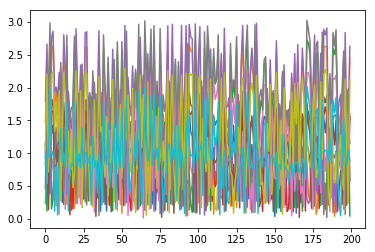

In [959]:
indices = [i for i in range(len(distance_features))]
for i in range(distance_features.shape[1]):
    plt.plot(indices, distance_features[:,i])
    
plt.show()
    

For a data point, the column(cluster) with less distance is the one actually predicted.

In [976]:
#point 0 belongs to class 9?
print('First point ', np.argmin(distance_features[0]))
print('Second point ', np.argmin(distance_features[1]))

First point  9
Second point  2


**Indeed**

In [974]:
points = np.vstack([X[0],X[1]])

In [977]:
kmeans.predict(points)

array([9, 2], dtype=int32)

Downsides of KMeans:
- knowing how many clusters, diameter, shape of data

### Agglomerative clusters

- The algorithms start by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satifisfied (in scikit learn: the number of clusters).

- There are several criteria specifying what it means 'most similar cluster'.

These measures are always defined between two existing clusters

1. ward: default choice, ward picks the two clusters **to merge such that the variance within all clusters increases the least**. Leads often to equally sized clusters

2. average: linking merges the two clusters that have the smallest average distance between all their points.

3. complete: (maximum linkage) merges the two clusters that have the smallest maximum distance between their points.

*Ward* works on most databases. If the clusters have very **disimilar members** average or complete might be better.

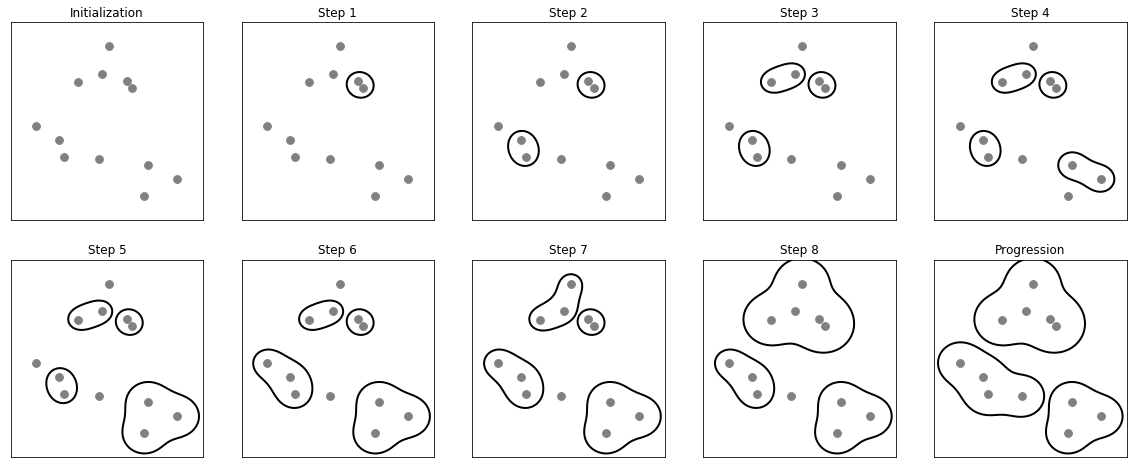

In [980]:
mglearn.plots.plot_agglomerative_algorithm()
plt.title('Progression')
plt.show()

At first each point is its own cluster. Then, the two clusters that are closest are merged, repeats until 4 two point clusters. Then they start merging. We specified 3 clusters.

**Agglomerative clustering** cannot make predictions for new data points, has no predict method. 

- Finds out the cluster membership for each data point with `fit_predict`.

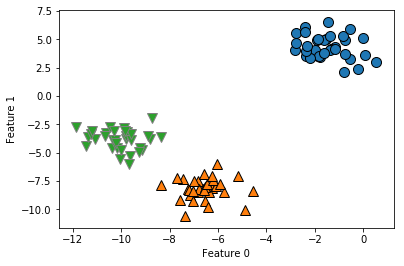

In [981]:
from sklearn.cluster import AgglomerativeClustering
X,y = make_blobs(random_state=1)

agg=AgglomerativeClustering(n_clusters=3)
# Here is the key!
assignment=agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],
                         X[:,1],
                         assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

- Agglomerative clustering produces what is known as hierarchical clustering. The clustering proceeds iteratively, **every point makes a journey from being a single point cluster to belonging to some final cluster**. 

- Each intermediate step provides a clustering data with different number of clusters. 

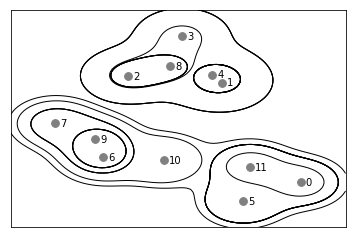

In [984]:
mglearn.plots.plot_agglomerative()

This kind of visualization only works for 2D.

For higher dimensional data a **dendogram** is required. Scikit-learn can't handle this yet. We have to use *SciPy*.

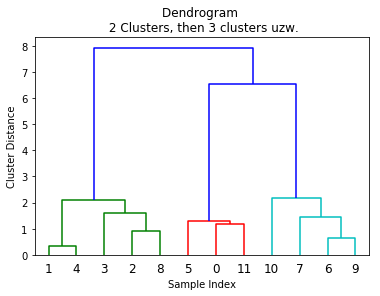

In [995]:
from scipy.cluster.hierarchy import dendrogram, ward

X,y = make_blobs(random_state=0, 
                 n_samples=12)
# Apply ward clustering to data X
# Scipy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# plot dendogram
dendrogram(linkage_array)

plt.title('Dendrogram \n 2 Clusters, then 3 clusters uzw.')
plt.ylabel('Cluster Distance')
plt.xlabel('Sample Index')
plt.show()

Representing single point clusters (points) as the leaves.

Reading from bottom to top. That going from 3 to 2 clusters has the highest distances, means these clusters are at a relatively large distance.

### DBSCAN (density based spatial clustering of applications with noise)

**No need to tell how many clusters, captures complex shapes, can identify points that are not part of any cluster.**

- Identifies points in crowded regions of the feature space, where many data points are close together => dense regions. 

- Points within a dense region are called *core samples/points* 

Has two parameters: 
1. `min_samples`
2. `eps`

If there are at least **min_samples** points within a distance of **eps** to a given point, that **data point is classified as core sample.**

If there are less than **min_samples** within a distance **eps** the point is labeled as *noise* (doesn't belong to any cluster).

Core samples closer to each other than **eps** distance are put in the same cluster.

- Finding good setting for eps is easier after using `StandardScaler` or `MinMaxScaler`, all features will have similar ranges.

#### Applying DBSCAN

In [998]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(clusters)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


**All data points were assigned the label -1** which stands for NOISE.

Consequence of the default parameters. See with other parameters

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


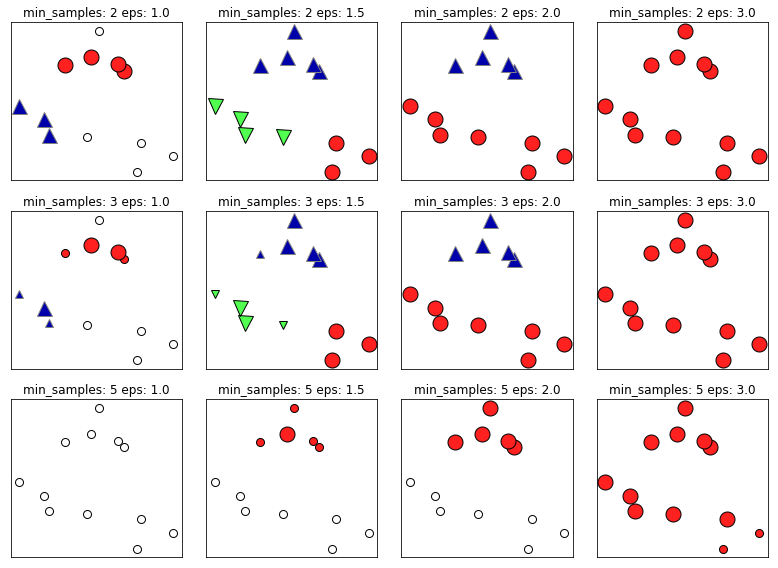

In [999]:
mglearn.plots.plot_dbscan()

- Increasing eps (left to right) more points included in the cluster. Too large means all points will be considered a single cluster.
- Increasing min_samples (top to bottom) the fewer points will be core points and more points would be considered noise (-1).

#### Applying DBSCAN to moons

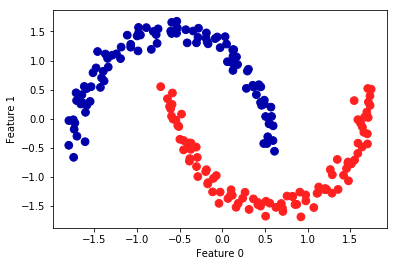

In [1001]:
X, y = make_moons(n_samples=200, 
                  noise=0.05,
                  random_state=0)

# rescale the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
#plot cluster assignments
plt.scatter(X_scaled[:, 0], 
            X_scaled[:, 1], c=clusters, 
            cmap = mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [1014]:
import pandas as pd
df = pd.DataFrame(X_scaled)
df.columns = ['Feature 0', 'Feature 1']
df['label'] = clusters
df.head()

,Feature 0,Feature 1,label
0,0.367485,0.545766,0
1,1.287320,-1.280303,1
2,-0.593976,0.043575,1
3,-1.741822,-0.663717,0
4,1.457051,-0.856678,1


### Evaluating clustering with ground truth

Assess the outcome of a clustering algorithm relative to a ground truth clustering. Both of these provide a quantitative measure between 0 and 1.
- adjusted rand index (ARI)
- normalized mutual information (NMI) 

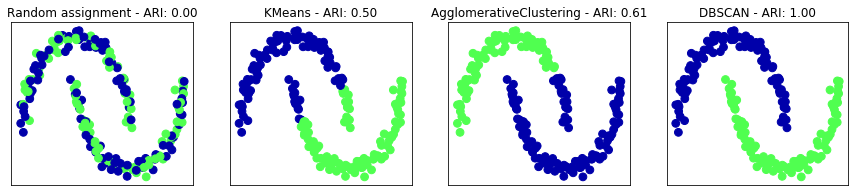

In [1016]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
    
# plot the cluster assignments and cluster centers 
    clusters = algorithm.fit_predict(X_scaled) 
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
    cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                               adjusted_rand_score(y, clusters)))


- The adjusted rand index provides intuitive results, with a random cluster assignment having a score of 0 and DBSCAN having a score of 1.

Common mistake is to use `accuracy_score` instaed of `adjusted_rand_score`. Accuracy requires the assigned labels to match the ground truth.

**The cluster labels themselves are meaningless, only thing that matters are which points are in the same cluster**

In [1017]:
from sklearn.metrics import accuracy_score

cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]

# accuracy is zero, none of the lables are the same
print(accuracy_score(cluster1, cluster2))

0.0


In [1018]:
print('ARI ', adjusted_rand_score(cluster1,cluster2))

ARI  1.0


There is still a big problem: there is no way to tell the ground truth to which to compare the results. 

- ARI and NMI usually only helps in developing algorithms, not in assessing success.

- It is very hard to tell the success of clustering algorithms. We don't know wether they correspond to anything we are interested in. **We have to analyze the clusters manually**.

### Comparing Algorithms on Faces